In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score


from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin

In [9]:
steam_reviews = pd.read_csv('Steam Reviews.csv')

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
import datetime
import re
import matplotlib.pyplot as plt
import altair as alt
import json
import requests
import pickle
import joblib

In [11]:
steam_reviews.isna().sum()

Unnamed: 0                          0
recommendationid                    0
author                              0
language                            0
review                            136
timestamp_created                   0
timestamp_updated                   0
voted_up                            0
votes_up                            0
votes_funny                         0
weighted_vote_score                 0
comment_count                       0
steam_purchase                      0
received_for_free                   0
written_during_early_access         0
hidden_in_steam_china               0
steam_china_location           252074
timestamp_dev_responded        248121
developer_response             248121
dtype: int64

In [12]:
steam_reviews.dropna(axis = 0, subset = ['review'],inplace = True)

In [13]:
steam_reviews.head()

,Unnamed: 0,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location,timestamp_dev_responded,developer_response
0,0,124161464,"{'steamid': '76561198803079878', 'num_games_ow...",english,"After 5 long years, Persona 5 fans can finally...",1666362303,1666362303,True,3992,1920,0.972005,68,True,False,False,True,NaN,NaN,NaN
1,1,124195354,"{'steamid': '76561198294111508', 'num_games_ow...",english,"Ok i bought it atlus, now put persona 6 on pc ...",1666412270,1666412270,True,2793,342,0.970613,0,True,False,False,True,NaN,NaN,NaN
2,2,124245771,"{'steamid': '76561198127451899', 'num_games_ow...",english,I'm a so called free thinker buying this game ...,1666484715,1666484715,True,2943,991,0.968603,3,True,False,False,True,NaN,NaN,NaN
3,3,125452616,"{'steamid': '76561199103077174', 'num_games_ow...",english,Tips after finishing the game:\n\nRead books t...,1668411864,1668411864,True,1674,654,0.967057,14,True,False,False,True,NaN,NaN,NaN
4,4,127884864,"{'steamid': '76561199117862352', 'num_games_ow...",english,The only bad thing about this game is that onc...,1670123536,1670123536,True,625,71,0.963678,0,True,False,False,True,NaN,NaN,NaN


In [14]:
re.split(',|\:|\}', steam_reviews['author'][0])

["{'steamid'",
 " '76561198803079878'",
 " 'num_games_owned'",
 ' 641',
 " 'num_reviews'",
 ' 9',
 " 'playtime_forever'",
 ' 2680',
 " 'playtime_last_two_weeks'",
 ' 0',
 " 'playtime_at_review'",
 ' 11',
 " 'last_played'",
 ' 1684465032',
 '']

In [15]:
def games_owned(review):
    return int(re.split(',|\:', str(review))[3])

In [16]:
steam_reviews['games_owned'] = steam_reviews['author'].apply(games_owned)

In [17]:
steam_reviews['games_owned'].median()

0.0

In [18]:
def games_reviewed(review):
    return int(re.split(',|\:', str(review))[5])

In [19]:
steam_reviews['games_reviewed'] = steam_reviews['author'].apply(games_reviewed)

In [20]:
def total_playtime(review):
    return float(re.split(',|\:', str(review))[7])

In [21]:
steam_reviews['total_playtime'] = steam_reviews['author'].apply(total_playtime)

In [22]:
def playtime_last_2_weeks(review):
    return int(re.split(',|\:', str(review))[9])

In [23]:
steam_reviews['playtime_last_2_weeks'] = steam_reviews['author'].apply(playtime_last_2_weeks)

In [24]:
def playtime_at_review(review):
    return int(re.split(',|\:', str(review))[11])

In [25]:
steam_reviews['playtime_at_review'] = steam_reviews['author'].apply(playtime_at_review)

In [26]:
def last_played(review):
    return datetime.datetime.fromtimestamp(int(re.split(',|\:|\}', str(review))[-2]))

In [27]:
steam_reviews['last_played'] = steam_reviews['author'].apply(last_played)

In [28]:
def word_count(review):
    return len(str(review).split())

In [29]:
len(steam_reviews['review'][0].split())

12

In [30]:
def review_type(data):
    if data:
        return 'Positive'
    if not data:
        return 'Negative'

In [31]:
steam_reviews['word_count'] = steam_reviews['review'].apply(word_count)

In [32]:
steam_reviews.to_csv('Steam Reviews Unpacked.csv')

In [33]:
steam_reviews_unpacked = pd.read_csv('Steam Reviews Unpacked.csv')

In [34]:
steam_reviews_unpacked.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'recommendationid', 'author', 'language',
       'review', 'timestamp_created', 'timestamp_updated', 'voted_up',
       'votes_up', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'hidden_in_steam_china', 'steam_china_location',
       'timestamp_dev_responded', 'developer_response', 'games_owned',
       'games_reviewed', 'total_playtime', 'playtime_last_2_weeks',
       'playtime_at_review', 'last_played', 'word_count'],
      dtype='object')

In [35]:
steam_reviews_unpacked.drop("Unnamed: 0.1", axis = 1, inplace = True)

In [36]:
steam_reviews_unpacked.drop('Unnamed: 0', axis = 1, inplace = True)

In [28]:
def updated(review):
    if review['timestamp_created'] == review['timestamp_updated']:
        return 0
    else:
        return 1
    

In [37]:
steam_reviews_culled = steam_reviews_unpacked[steam_reviews_unpacked['total_playtime'] < 2000]

In [30]:
steam_reviews_culled['total_playtime'].describe()

count    134693.000000
mean        729.678766
std         558.215249
min           5.000000
25%         246.000000
50%         612.000000
75%        1153.000000
max        1999.000000
Name: total_playtime, dtype: float64

In [31]:
steam_reviews_culled.shape

(134693, 25)

In [32]:
y = steam_reviews_culled['weighted_vote_score']

In [33]:
X = steam_reviews_culled.drop('weighted_vote_score', axis = 1)

In [34]:
X.columns

Index(['recommendationid', 'author', 'language', 'review', 'timestamp_created',
       'timestamp_updated', 'voted_up', 'votes_up', 'votes_funny',
       'comment_count', 'steam_purchase', 'received_for_free',
       'written_during_early_access', 'hidden_in_steam_china',
       'steam_china_location', 'timestamp_dev_responded', 'developer_response',
       'games_owned', 'games_reviewed', 'total_playtime',
       'playtime_last_2_weeks', 'playtime_at_review', 'last_played',
       'word_count'],
      dtype='object')

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8)

In [55]:
ct_playtime = ColumnTransformer([("scale", StandardScaler(),['total_playtime', 'playtime_at_review'])])

In [47]:
playtime_pipe = Pipeline([('scale', ct_playtime), ('fit', RandomForestRegressor(max_depth = 100))])

In [56]:

playtime_data = ct_playtime.fit_transform(X_train)

In [62]:
rf_params = {'max_depth': [20, 50], 'min_samples_split':  [5]}

In [63]:

ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100 , 1000]}

playtime_search = GridSearchCV(RandomForestRegressor(), rf_params)


In [64]:
playtime_search.fit(playtime_data, y_train)

KeyboardInterrupt: 

In [61]:
playtime_search.best_params_

{'max_depth': 20, 'min_samples_split': 5}

In [48]:
playtime_pipe.fit(X_train, y_train)

Pipeline(steps=[('scale',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['total_playtime',
                                                   'playtime_at_review'])])),
                ('fit', RandomForestRegressor(max_depth=100))])

In [49]:
y_pred = playtime_pipe.predict(X_train)

In [51]:
max(y_pred)

0.9800289273262024

In [52]:
ct_ownership = ColumnTransformer([('scale', StandardScaler(), ['games_owned', 'games_reviewed'])])

In [53]:
ownership_pipe = Pipeline([('scale', ct_ownership), ('fit', Ridge(alpha = 100))])

In [54]:
ownership_data = ct_ownership.fit_transform(X_train)

In [55]:
ownership_search = GridSearchCV(Ridge(), ridge_params)
ownership_search.fit(ownership_data ,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]})

In [56]:
ownership_search.best_params_

{'alpha': 100}

In [57]:
ownership_pipe.fit(X_train, y_train)

Pipeline(steps=[('scale',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['games_owned',
                                                   'games_reviewed'])])),
                ('fit', Ridge(alpha=100))])

In [58]:
y_pred = ownership_pipe.predict(X_train)

In [59]:
max(y_pred)

0.8126750388216093

In [60]:
min(y_pred)

0.5266680276270902

In [67]:
ct_engagement = ColumnTransformer([('scale', StandardScaler(), ['comment_count'])])

In [68]:
engagement_data = ct_engagement.fit_transform(X_train)

In [72]:
engagement_search = GridSearchCV(RandomForestRegressor(), rf_params)
engagement_search.fit(engagement_data, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 50], 'min_samples_split': [6, 10]})

In [73]:
engagement_search.best_params_

{'max_depth': 50, 'min_samples_split': 6}

In [74]:
engagement_pipe = Pipeline([('pass', ct_engagement), ('fit', RandomForestRegressor(max_depth = 50, min_samples_split = 6))])
engagement_pipe.fit(X_train, y_train)

Pipeline(steps=[('pass',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['comment_count'])])),
                ('fit',
                 RandomForestRegressor(max_depth=50, min_samples_split=6))])

In [75]:
y_pred = engagement_pipe.predict(X_train)

In [76]:
max(y_pred)

0.9782300591468812

In [77]:
min(y_pred)

0.6570007374113748

In [81]:
ct_count = ColumnTransformer([('scale', StandardScaler(), ['word_count'])])

In [82]:
ct_data = ct_count.fit_transform(X_train)

In [83]:
count_search = GridSearchCV(RandomForestRegressor(), rf_params)
count_search.fit(ct_data, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 50, 100],
                         'min_samples_split': [2, 5, 10]})

In [85]:
count_search.best_params_

{'max_depth': 50, 'min_samples_split': 2}

In [86]:
count_pipe = Pipeline([('scale', ct_count), ('fit', RandomForestRegressor(max_depth = 50, min_samples_split = 2))])

In [87]:
count_pipe.fit(X_train, y_train)

Pipeline(steps=[('scale',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['word_count'])])),
                ('fit', RandomForestRegressor(max_depth=50))])

In [88]:
y_pred = count_pipe.predict(X_train)

In [89]:
max(y_pred)

0.954229712486267

In [90]:
min(y_pred)

0.5131467580795288

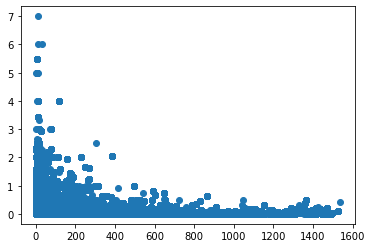

In [46]:
plt.scatter(x = steam_reviews_culled['word_count'], y = steam_reviews_culled['votes_funny']/steam_reviews_culled['votes_up'])

In [36]:
steam_reviews_culled['joke_rating'] = steam_reviews_culled['votes_funny']/steam_reviews['votes_up']

C:\Users\kpriv\AppData\Local\Temp\ipykernel_11036\3962052547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steam_reviews_culled['joke_rating'] = steam_reviews_culled['votes_funny']/steam_reviews['votes_up']


In [37]:
steam_reviews_culled['joke_rating'].describe()

count    1.346260e+05
mean              inf
std               NaN
min      0.000000e+00
25%      0.000000e+00
50%      4.347826e-02
75%      2.857143e-01
max               inf
Name: joke_rating, dtype: float64

In [55]:
steam_reviews_culled = steam_reviews_culled[steam_reviews_culled['joke_rating'] < 10]

In [56]:
steam_reviews_culled.shape

(133113, 26)

In [43]:
def is_joke(data):
    if data >= (1/3):
        return 1
    else:
        return 0

In [107]:
steam_reviews_culled['joke'] = steam_reviews_culled['joke_rating'].apply(is_joke)

In [120]:
X = steam_reviews_culled.drop('joke', axis = 1)
y = steam_reviews_culled['joke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8)

In [270]:
ct_joke = ColumnTransformer(
    [('select_columns', MinMaxScaler(feature_range = (0, 100)), ['games_reviewed', 'word_count'])]
)
joke_model = KNeighborsClassifier(n_neighbors = 100, weights = 'distance')
joke_pipe = Pipeline([('transform', ct_joke), ('fit', joke_model)])

In [248]:
joke_data = ct_joke.fit_transform(X_train, y_train)

In [278]:
joke_params = {'n_neighbors' : [5, 10 , 20], 'weights' : ['uniform', 'distance']}
joke_search = GridSearchCV(joke_model, joke_params, scoring = 'recall')
joke_search.fit(joke_data, y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=100,
                                            weights='distance'),
             param_grid={'n_neighbors': [5, 10, 20],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [279]:
joke_search.cv_results_

{'mean_fit_time': array([0.04741721, 0.04571238, 0.04585066, 0.04648104, 0.04669867,
        0.04615879]),
 'std_fit_time': array([0.00403564, 0.0012303 , 0.00167828, 0.00045575, 0.00176382,
        0.00162043]),
 'mean_score_time': array([0.48095765, 0.06864381, 0.49273272, 0.08497305, 0.52976875,
        0.11243472]),
 'std_score_time': array([0.00540881, 0.00428066, 0.00826821, 0.00156334, 0.01278549,
        0.00374404]),
 'param_n_neighbors': masked_array(data=[5, 5, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5, 'weights': 'uniform'},
  {'n_neighbors': 5, 'weights': 'distance'},
  {'n_neighbors': 10, 'weights': 'uniform'},
  {'n

In [271]:
joke_pipe.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('select_columns',
                                                  MinMaxScaler(feature_range=(0,
                                                                              100)),
                                                  ['games_reviewed',
                                                   'word_count'])])),
                ('fit',
                 KNeighborsClassifier(n_neighbors=100, weights='distance'))])

In [272]:
joke_pipe.score(X_train, y_train)

0.8593482956146117

In [273]:
joke_pipe.score(X_test, y_test)

0.8478758967809789

In [274]:
joke_predictions_training = joke_pipe.predict(X_train)
joke_predictions_testing = joke_pipe.predict(X_test)

In [275]:
recall_score(y_train, joke_predictions_training)

0.49579520158298296

In [276]:
recall_score(y_test, joke_predictions_testing )

0.4747590263028917

In [44]:
filename = 'joke_detector.sav'
joblib.dump(joke_pipe, filename)

NameError: name 'joke_pipe' is not defined

In [45]:
joke_detector = joblib.load('joke_detector.sav')

In [42]:
class ModelTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, model):
        self.model = model
    
    def fit(self, X, y):
        # Fit the stored predictor.
        # Question: what should be returned?
      
        return self
    
    def transform(self, X):
        # Use predict on the stored predictor as a "transformation".
        # Be sure to return a 2-D array.
        return np.array(self.model.predict(X)).reshape(-1,1)

In [92]:
count_model = ModelTransformer(count_pipe)
playtime_model = ModelTransformer(playtime_pipe)
engagement_model = ModelTransformer(engagement_pipe)
ownership_model = ModelTransformer(ownership_pipe)

In [93]:
all_features = FeatureUnion([('count', count_model), ('playtime', playtime_model),
                          ('engagement', engagement_model), ('ownership', ownership_model)])

In [97]:
model = Pipeline([('union', all_features), ('fit', Ridge(alpha = 0.01))])

In [94]:
model_data = all_features.fit_transform(X_train, y_train)

In [95]:
model_search = GridSearchCV(Ridge(), ridge_params)
model_search.fit(model_data, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]})

In [96]:
model_search.best_params_

{'alpha': 0.01}

In [98]:
model.fit(X_train, y_train)

Pipeline(steps=[('union',
                 FeatureUnion(transformer_list=[('count',
                                                 ModelTransformer(model=Pipeline(steps=[('scale',
                                                                                         ColumnTransformer(transformers=[('scale',
                                                                                                                          StandardScaler(),
                                                                                                                          ['word_count'])])),
                                                                                        ('fit',
                                                                                         RandomForestRegressor(max_depth=50))]))),
                                                ('playtime',
                                                 ModelTransformer(model=Pipeline(steps=[('scale',
                   

In [99]:
y_pred_final = model.predict(X_train)

In [100]:
min(y_pred_final)

0.2312717299559759

In [101]:
max(y_pred_final)

1.0287294148667059

In [38]:
def get_reviews(app):
    parameters = {'filter':'recent', 'langauge':'en',  'cursor' : '*', 
                      'review_type' : 'all', 'purchase_type' : 'all', 'num_per_page' : 100}
    for i in range(20):
        temp_url = "https://store.steampowered.com/appreviews/{appid}?json=1".format(appid = app)
        response = requests.get(temp_url, params = parameters)
        json = response.json()
        temp_df = pd.DataFrame.from_records(json['reviews'])
        if i == 0:
            reviews = temp_df
        else:
            reviews = pd.concat([reviews, temp_df])
        if len(json['reviews']) < 100:
            break
        
        parameters['cursor'] = json['cursor']
    reviews.dropna(axis = 0, subset = ['review'],inplace = True)
    reviews['games_owned'] = reviews['author'].apply(games_owned)
    reviews['games_reviewed'] = reviews['author'].apply(games_reviewed)
    reviews['total_playtime'] = reviews['author'].apply(total_playtime)
    reviews['playtime_last_2_weeks'] = reviews['author'].apply(playtime_last_2_weeks)
    reviews['playtime_at_review'] = reviews['author'].apply(playtime_at_review)
    reviews['last_played'] = reviews['author'].apply(last_played)
    reviews['word_count'] = reviews['review'].apply(word_count)
    reviews['joke_rating'] = reviews['votes_funny']/reviews['votes_up']
    reviews['joke'] = reviews['joke_rating'].apply(is_joke)
    reviews['review_type'] = reviews['voted_up'].apply(review_type)
    
    return reviews

In [39]:
def generate_predictions(data):
    
    inputs = data.drop(['weighted_vote_score', 'joke'], axis = 1) 
    predictions = augmented_metascore_model.predict(inputs)
    joke_predictions = joke_detector.predict(inputs)
    predictions_normalized = (predictions - np.min(predictions))/(np.max(predictions) - np.min(predictions))
    
    predictions = pd.Series(predictions_normalized)
    #data = {'helpfulness_score' : predictions, 'review_type': data['review_type'], 'review_text' : data['review'] }
    #pred_frame = pd.DataFrame(data)
    jokes = pd.Series(joke_predictions).tolist()
    scores = pd.Series(predictions).tolist()
    word_counts = pd.Series(data['word_count']).tolist()
    for i in range(len(jokes)):
        if jokes[i] == 1 or word_counts[i] < 100:
            scores[i] /= 10
        
    scores = pd.Series(scores)
    
    
    pred_frame = scores.to_frame(name = 'helpfulness_score')
    
    pred_frame['joke'] = pd.Series(jokes)
    pred_frame['review_type'] = pd.Series(data['review_type'].tolist())
    pred_frame['review_text'] = pd.Series(data['review'].tolist())
    
    
    return pred_frame
    
    

In [63]:
def augmented_metascore(data):
    
    #predictions_normalized = (predictions - np.min(predictions))/(np.max(predictions) - np.min(predictions))
    votes = data['review_type']
    scores = data['helpfulness_score']
    positives = 0
    score = 0
    for i in range(len(votes)):   
        if votes[i] == "Positive":
            score += scores[i]
            positives += 1
    
    score /= scores.sum()
    
    raw_score = positives/len(votes)
    return 'Augmented Score:' + ' ' + str(100*score) + ' ' +  '|' + ' ' 'Raw Score:' + ' ' + str((100*raw_score))
    
    

In [46]:
game_reviews = get_reviews('775500')

In [47]:
game_reviews.shape

(2000, 26)

In [48]:
game_reviews.columns

Index(['recommendationid', 'author', 'language', 'review', 'timestamp_created',
       'timestamp_updated', 'voted_up', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'steam_purchase',
       'received_for_free', 'written_during_early_access',
       'hidden_in_steam_china', 'steam_china_location', 'games_owned',
       'games_reviewed', 'total_playtime', 'playtime_last_2_weeks',
       'playtime_at_review', 'last_played', 'word_count', 'joke_rating',
       'joke', 'review_type'],
      dtype='object')

In [55]:
predictions = generate_predictions(game_reviews)

In [56]:
predictions.head()


,helpfulness_score,joke,review_type,review_text
0,0.028695,1,Negative,Generic cringe don't bother.
1,0.033481,0,Positive,"Great game, plays very smooth especially on St..."
2,0.022964,0,Positive,hanabi ichijo has my heart
3,0.037473,1,Positive,cool looking stylized JRPG
4,0.031257,0,Negative,5 minutes of gameplay for every 15 minutes of ...


In [378]:
game_reviews.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,...,games_owned,games_reviewed,total_playtime,playtime_last_2_weeks,playtime_at_review,last_played,word_count,joke_rating,joke,review_type
0,143168799,"{'steamid': '76561198343779872', 'num_games_ow...",english,"Despite the name, this is not a ""Tales of"" game.",1690839633,1690839633,False,0,0,0,...,0,25,260.0,0,260,2023-04-27 21:13:43,10,NaN,0,Negative
1,143132643,"{'steamid': '76561198321782894', 'num_games_ow...",english,"Combat is fun, which is good, since there's a ...",1690792172,1690792172,True,0,0,0,...,0,3,4125.0,1498,4125,2023-07-30 13:32:43,75,NaN,0,Positive
2,143130179,"{'steamid': '76561198977690354', 'num_games_ow...",english,Pros:\n1) A pretty fun battle system. \n2) Lik...,1690787648,1690839900,True,0,0,0,...,442,92,4816.0,4816,4816,2023-07-30 23:39:38,234,NaN,0,Positive
3,143124569,"{'steamid': '76561198185332659', 'num_games_ow...",english,"I didn't like the game, so I'm gonna post some...",1690776448,1690776448,False,3,0,0.532960891723632813,...,0,2,3021.0,891,3021,2023-07-30 20:33:14,297,0.0,0,Negative
4,143122234,"{'steamid': '76561197993384256', 'num_games_ow...",english,Loved this game! It has a deep story with inte...,1690772406,1690772406,True,0,0,0,...,0,21,4127.0,777,4127,2023-07-30 19:54:07,43,NaN,0,Positive


In [50]:
filename = 'augmented_metascore_model.sav'


In [204]:
joblib.dump(model, filename)

NameError: name 'model' is not defined

In [51]:
augmented_metascore_model = joblib.load(filename)

In [53]:
def is_helpful(data):
    if data <= 0.1:
        return "Not Helpful"
    else:
        return "Helpful"

In [87]:
def make_chart(data):
    data['Helpful?'] = data['helpfulness_score'].apply(is_helpful)
    return alt.Chart(data, title = "Helpful vs. Unhelpful Review Totals").mark_bar().encode(alt.X("Helpful?"), 
                                                          y = alt.Y('count()').stack(None).axis().title('Number of Reviews'), 
                                                          color = alt.Color('review_type').scale(scheme = 'redblue'), 
                                                          column = 'review_type'
                                                          ).properties(width = 200).configure_title(anchor = 'middle')
                                                

In [64]:
augmented_metascore(predictions)

'Augmented Score: 72.23333151822342 | Raw Score: 79'

In [88]:
make_chart(predictions)

alt.Chart(...)

In [84]:
references = pd.read_csv('references.csv')

In [85]:
def name_to_id(game):
    game_list = references['name'].tolist()
    index = game_list.index(game)
    return str(references['appid'][index])

In [12]:
name_to_id('Dota 2')

'570'

In [86]:
references.head()

,Unnamed: 0,appid,name
0,0,570.0,Dota 2
1,1,730.0,Counter-Strike: Global Offensive
2,2,1172470.0,Apex Legends
3,3,1063730.0,New World
4,4,578080.0,PUBG: BATTLEGROUNDS


In [380]:
def top_3_positive(data):
    pos_data = data[data['review_type'] == 'Positive']
    pos_data = pos_data.sort_values('helpfulness_score')
    top_3 = pos_data.tail(3)['review_text'].tolist()
    return top_3
    

In [397]:
top_3 = top_3_positive(predictions)

In [400]:
print(top_3[2])

I really enjoyed this title at the start. The combat and graphics are great and the story has an interesting premise. 

The game completely drops the ball with its plot at what feels the half way mark to then throw you into the final arc and spoil all the character development and world building up till that point with a half baked villain and a massive expectation let down for what it lead the player to believe would be the next arc of the story.

I know it's been mentioned plenty of times but the music ranges from middling to generic to bad and while it may sound overstated it's honestly true.

I had high hopes for this new entry and while it's very pretty and fun to play story-wise I'd say it's one of the worst stories they've given us. I think the romance is honestly the only reason this game got the reception it did from people bc without that one aspect it would be an utterly forgettable entry.

I recommend this title if you already know you like tales or you like anime and or ac

In [244]:
def top_3_negative(data):
    neg_data = data[data['review_type'] == 'Negative']
    neg_data = neg_data.sort_values('helpfulness_score')
    top_3 = neg_data.tail(3)['review_text'].tolist()
    return top_3

In [386]:
top_3n = top_3_negative(predictions)

In [403]:
top_3n[2]

'Forgettable plot, boring side quests, boring NPCs, boring party...\nAlso removed the decision making of equipment that was present in every other title other than a minor buff to specific attack types that is easily ruled out of use\nAnd with most boss fights turning into grind fests just to beat them thanks to gank machanics.\nBut now, a detailed break down on each of the party members (that I can remember):\n\nAlphen - No memory, no pain, weapons bring me joy, basic gag is "I like spicy stuff"\nShionne - hates other due to wanting something from her, brings pain to any that touch her (except Alphen), fashion girl, is a also foodie\nRinwell - persecuted witch, racist against oppressors (including Shionne [for most of the game]), also save the owls (her only reliable friend)\nLaw - angry at world, angry at you, why did you take my parents away\nDohalim - i\'m a lord but don\'t want to be, practices higher being stuff still, tea time \nKisara - I honor my vow to protect Dohalim, I fish

In [346]:
game_reviews[game_reviews['word_count'] == 60]

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,...,games_owned,games_reviewed,total_playtime,playtime_last_2_weeks,playtime_at_review,last_played,word_count,joke_rating,joke,review_type
42,139869480,"{'steamid': '76561198018607204', 'num_games_ow...",english,"A nice game,\n+ Good story\n+ Combat is good, ...",1686454308,1686454308,True,0,0,0,...,0,16,2116.0,0,2116,2023-06-10 20:20:21,60,NaN,0,Positive
96,131802178,"{'steamid': '76561198134757136', 'num_games_ow...",english,The combat feels overall floaty and gives me t...,1674999396,1675001079,False,0,0,0,...,0,18,82.0,0,72,2023-01-29 06:00:49,60,NaN,0,Negative
